In [96]:
f= '''
=================================================
Milestone

Nama  : M Hafiz Juliant
Batch : RMT - 028

Program ini dibuat untuk melakukan automatisasi pengolahan (cleaning) data text yang berguna untuk pemodelan model analisa sentimen.
=================================================
'''
print(f)


Milestone

Nama  : M Hafiz Juliant
Batch : RMT - 028

Program ini dibuat untuk melakukan automatisasi pengolahan (cleaning) data text yang berguna untuk pemodelan model analisa sentimen.



Dashboard Tableau Public :
https://public.tableau.com/app/profile/hafiz.juliant/viz/Milestone_17072508011930/Dashboard1?publish=yes

1. Identifikasi Masalah

Topik :
Transfer Pemain Sepakbola di Liga Top 5 dari tahun 2000 sampai 2018

Latar Belakang : 
Pasar transfer sepak bola sangat mirip dengan ekonomi global. Ketika terjadi peristiwa global yang berdampak pada ekonomi global, pasar transfer sepak bola juga terpengaruh. Dimulai dari musim 2002/03, secara bertahap mengalami peningkatan. Namun, peningkatannya sangat besar pada musim 2013/14 dan mulai melesat seperti roket. Jadi Saya akan memberikan pemahaman umum tentang bursa transfer sepak bola.

Specific   : Mendapatkan keuntungan dari transfer fee pada Transfer Market

Measurable : Tim mendapat keuntungan dari transfer fee yang cukup tinggi

Achievable : Dengan menggunakan keterampilan dan pengetahuan Data Science yang saya miliki dari bootcamp Hacktiv8, saya akan menggunakan teknik analisis data yang tepat untuk mengolah data Transfer Market dan menarik kesimpulan yang relevan

Relevant   : Analisis ini akan membantu saya memahami faktor apasaja yang mempengaruhi pendapatan tim dari transfer fee pada Transfer Market 

Time-Bound : Analisis data akan selesai dalam waktu 2 minggu setelah pengumpulan data dimulai, dengan rencana untuk menyelesaikan laporan analisis dalam 3 minggu setelah itu.

Problem statement : Tujuan utamanya adalah untuk mendapatkan keuntungan dari transfer fee pada Transfer Market, dengan ini harus diketuhui dulu faktor apasaja yang mempengaruhi pendapatan tiap tim. Keuntungan akan dicapai ketika tim memiliki pendapatan yang lebih besar dibanding pengeluaran tim itu sendiri pada Transfer market.


Penjabaran Masalah :
1. Bagaimana perkembangan transfer pemain dari tahun ke tahun ?
2. Bagaimana perbandingan harga rata rata pemain ditiap liga ?
3. Berapa rata rata biaya transfer berdasarkan posisi pemain ?
4. Bagaimana transfer tertinggi pada setiap posisi ?
5. Tim manakah yang memiliki keuntungan tertinggi dari transfer pemain ?
6. Ke liga manakah tim dengan keuntungan tertinggi tersebut menjual pemainnya ?
7. Bagaimana posisi pemain mempengaruhi harga pemain tersebut, apakah posisi penyerang memiliki harga yang lebih tinggi dibanding posisi lainnya?


2. Data Loading

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [98]:
df = pd.read_csv('transfer.csv')

df

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000
...,...,...,...,...,...,...,...,...,...,...
4695,Jasmin Kurtic,Attacking Midfield,29,Atalanta,Serie A,SPAL,Serie A,2018-2019,5000000.0,4800000
4696,Tchê Tchê,Central Midfield,25,Palmeiras,Série A,Dynamo Kyiv,Premier Liga,2018-2019,3000000.0,4800000
4697,Silvan Widmer,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018-2019,8500000.0,4500000
4698,Yuya Osako,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018-2019,4500000.0,4500000


Data set diambil dari website : https://www.kaggle.com/datasets/vardan95ghazaryan/top-250-football-transfers-from-2000-to-2018/data

3. Data Cleaning

In [99]:
df.columns

Index(['Name', 'Position', 'Age', 'Team_from', 'League_from', 'Team_to',
       'League_to', 'Season', 'Market_value', 'Transfer_fee'],
      dtype='object')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [101]:
## Data Transfer_fee terlalu panjang maka diubah dalam satuan juta/milion 

df.Transfer_fee = df.Transfer_fee/1000000
df = df.rename(columns = {"Transfer_fee":"Transfer_fee_M"})
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee_M
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60.00
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56.81
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40.00
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36.15
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34.50


In [102]:
df.Position.unique()

array(['Right Winger', 'Centre-Forward', 'Left Winger', 'Centre-Back',
       'Central Midfield', 'Attacking Midfield', 'Defensive Midfield',
       'Second Striker', 'Goalkeeper', 'Right-Back', 'Left Midfield',
       'Left-Back', 'Right Midfield', 'Forward', 'Sweeper', 'Defender',
       'Midfielder'], dtype=object)

In [103]:
##posisi dikelompokan menjadi Forward, Midfielder, Defender and Goalkeeper 
df = df.replace(["Right Winger","Second Striker","Left Winger","Centre-Forward"], "Forward")
df = df.replace(["Central Midfield", "Attacking Midfield", "Defensive Midfield", "Left Midfield", "Right Midfield",
                                    ],
                 "Midfielder")
df = df.replace(["Centre-Back", "Right-Back", "Left-Back", "Sweeper"], "Defender")

df.sort_values("Transfer_fee_M", ascending = False)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee_M
4211,Neymar,Forward,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.0,222.000
4455,Kylian Mbappé,Forward,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135.000
4212,Philippe Coutinho,Midfielder,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90000000.0,125.000
4456,Cristiano Ronaldo,Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117.000
4213,Ousmane Dembélé,Forward,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017-2018,33000000.0,115.000
...,...,...,...,...,...,...,...,...,...,...
736,Apostolos Liolidis,Forward,24,Aris Saloniki,Super League,Atalanta,Serie A,2002-2003,NaN,0.900
735,Sebastián Cejas,Goalkeeper,27,Siena,Serie B,Ascoli,Serie B,2002-2003,NaN,0.900
734,Kléber Pereira,Forward,26,Atlético-PR,Brazil,Tigres UANL,Mexico,2002-2003,NaN,0.900
740,Cata Díaz,Defender,23,CA Rosario,Argentina,CD Cruz Azul,Mexico,2002-2003,NaN,0.850


In [104]:
#Mengubah - menjadi / pada kolom Season
df['Season']=df['Season'].str.replace('-','/')
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee_M
0,Luís Figo,Forward,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000/2001,NaN,60.00
1,Hernán Crespo,Forward,25,Parma,Serie A,Lazio,Serie A,2000/2001,NaN,56.81
2,Marc Overmars,Forward,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000/2001,NaN,40.00
3,Gabriel Batistuta,Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000/2001,NaN,36.15
4,Nicolas Anelka,Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000/2001,NaN,34.50


In [105]:
#Memfilter data dengan hanya 5 liga saja
top5 = ['Premier League', 'Serie A', 'LaLiga', 'Ligue 1', '1.Bundesliga']
df_top5 = df.loc[(df['League_to'].isin(top5))]
df_top5 = df_top5.drop('Market_value', axis=1)
df_top5

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee_M
0,Luís Figo,Forward,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000/2001,60.00
1,Hernán Crespo,Forward,25,Parma,Serie A,Lazio,Serie A,2000/2001,56.81
2,Marc Overmars,Forward,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000/2001,40.00
3,Gabriel Batistuta,Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000/2001,36.15
4,Nicolas Anelka,Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000/2001,34.50
...,...,...,...,...,...,...,...,...,...
4692,Giangiacomo Magnani,Defender,22,Juventus,Serie A,Sassuolo,Serie A,2018/2019,5.00
4693,Giangiacomo Magnani,Defender,22,Perugia,Serie B,Juventus,Serie A,2018/2019,5.00
4694,Evan N'Dicka,Defender,18,AJ Auxerre,Ligue 2,E. Frankfurt,1.Bundesliga,2018/2019,5.00
4695,Jasmin Kurtic,Midfielder,29,Atalanta,Serie A,SPAL,Serie A,2018/2019,4.80


Analisis dan perhitungan

1. Bagaimana perkembangan transfer pemain dari tahun ke tahun ?

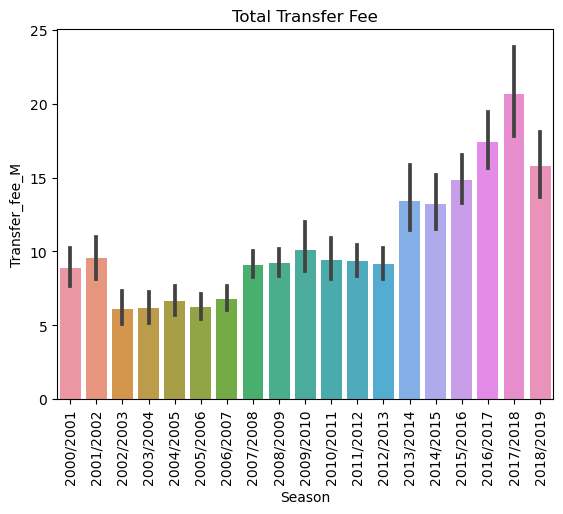

In [106]:
#Menampilkan plot transfer pemain dari tahun
plt.title("Total Transfer Fee")
sns.barplot(x = df_top5.Season, y = df_top5.Transfer_fee_M)
plt.xticks(rotation=90);

Dari plot diatas dapat dilihat Jumlah Transfer fee dari musim 2000/2001 hingga 2018/2019, pada musim-musim tersebut memiliki nilai yang stabil namun dimulai musim 2013/2014 didapatkan peningkatan yang signifikan hingga puncaknya pada musim 2017/2018

2. Bagaimana perbandingan harga rata rata pemain ditiap liga ?

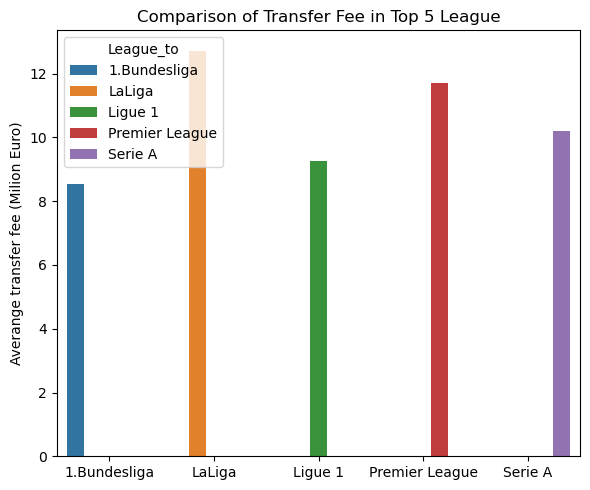

In [107]:
price_comparison = df_top5.groupby('League_to')['Transfer_fee_M'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x = price_comparison['League_to'], y = price_comparison['Transfer_fee_M'], hue=price_comparison['League_to'])
plt.xlabel('')
plt.ylabel('Averange transfer fee (Milion Euro)')
plt.title('Comparison of Transfer Fee in Top 5 League')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

Dilihat dari grafik diatas didapat bahwa Laliga memiliki nilai rata rata Transfer fee paling tinggi dengan nilai diatas 12 juta euro diikuti dengan Premier league, Serie A, Ligue 1 dan Bundenliga pada posisi terakhir.

3. Berapa rata rata biaya transfer berdasarkan posisi pemain ?

In [108]:
#Memunculkan rata rata transfer fee pemain berdasarkan posisi
avg_transfer_pos = df_top5.groupby(["Season", "Position"], as_index =False).agg(Transfer_fee_M=("Transfer_fee_M", "mean"))

position = avg_transfer_pos.groupby(["Position"], as_index = False).agg(Transfer_fee_M=("Transfer_fee_M", "mean"))

position

,Position,Transfer_fee_M
0,Defender,9.062049
1,Forward,11.881359
2,Goalkeeper,8.094460
3,Midfielder,10.681458


Data diatas menunjukkan nilai rata rata harga pemain berdasarkan posisi yaitu Penyerang sebesar 11.88 juta euro, Midfielder sebesar 10.68 juta euro, Pemain belakang 9.06 juta euro dan Kiper sebesar. Jadi dapat disimpulkan bahwa posisi penyerang memiliki harga yang lebih mahal dibandingkan posisi lainnya

4. Bagaimana transfer tertinggi pada setiap posisi ?

In [109]:
top_transfer_pos = df_top5.sort_values('Transfer_fee_M').drop_duplicates(["Position"], keep='last')

top_transfer_pos

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee_M
4459,Alisson,Goalkeeper,25,AS Roma,Serie A,Liverpool,Premier League,2018/2019,62.5
4215,Virgil van Dijk,Defender,26,Southampton,Premier League,Liverpool,Premier League,2017/2018,78.8
4212,Philippe Coutinho,Midfielder,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017/2018,125.0
4211,Neymar,Forward,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017/2018,222.0


Dari data diatas dapat dilihat bahwa Transfer fee paling tinggi adalah Neymar yang berposisi sebagai penyerang dengan transfer fee senilai 222 Juta Euro, diikuti Philippe Coutinho dengan 125 Juta Euro, Virgil van Dijk dengan 78.8 Juta Euro dan Alisson dengan 62.5 Juta Euro. Hal ini juga menandakan bahwa posisi penyerang memiliki nilai transfer fee yang lebih tinggi dari posisi lainnya


5. Tim manakah yang memiliki keuntungan tertinggi dari transfer pemain ?

In [110]:
#Membuat tabel baru untuk melihat pendapatan dan pengeluaran dari tiap tim  
clubs_income = df_top5.groupby(["Team_from"], as_index = False).agg(Total_Income_M = ("Transfer_fee_M", "sum"))
clubs_expense = df_top5.groupby(["Team_to"], as_index = False).agg(Total_Expense_M = ("Transfer_fee_M", "sum"))
clubs = clubs_income.merge(clubs_expense, left_on="Team_from", right_on="Team_to")
clubs = clubs.drop(["Team_to"], axis=1)
clubs = clubs.rename(columns = {"Team_from":"Team"} )
clubs["Net_Spend_M"] = clubs.Total_Income_M-clubs.Total_Expense_M

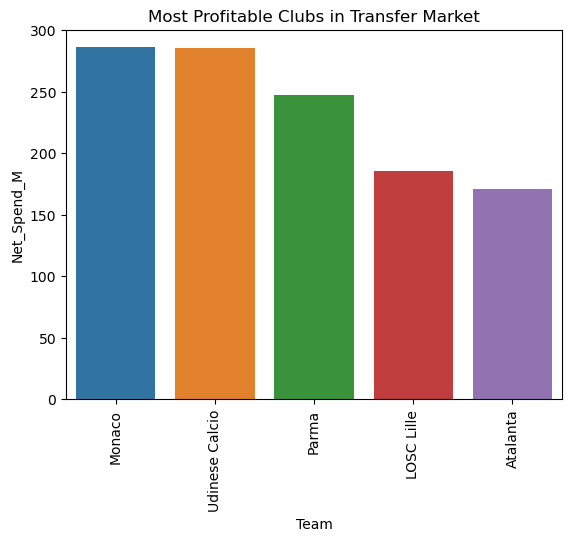

In [111]:
#Memunculkan plot 5 tim dengan keuntungan terbesar 
clubs_positive_net = clubs.sort_values("Net_Spend_M", ascending = False).head(5)
plt.title("Most Profitable Clubs in Transfer Market")
sns.barplot(x= clubs_positive_net.Team, y = clubs_positive_net.Net_Spend_M);
plt.xticks(rotation = 90);

Dilihat dari data diatas menunjukkan top 5 tim yang memiliki keuntungan paling banyak dari Transfer Market pada posisi pertama yaitu Monaco dari Ligue 1, diikuti Udinese dan Parma dari Serie A, Lille dari Ligue 1 dan Atalanta dari Serie A. Tim-tim ini berasal dari Serie A dan Ligue 1 yang bukan merupakan tim top atau tim besar eropa jadi saya menarik kesimpulan bahwa tim tim ini cenderung menjual pemainnya dengan harga tinggi ke tim top atau tim yang memiliki kekuatan financial tinggi. 

6. Ke liga manakah tim dengan keuntungan tertinggi tersebut menjual pemainnya ?

In [112]:
#Tiap tim(team_from== ) dikelompokkan berdasarkan ke liga mana mereka menjual pemainnya(league_to) dan diurutkan berdasarkan transfer fee nya
Udinese_Calcio = df_top5[(df_top5.Team_from == "Udinese Calcio")]
Udinese_Calcio_five = Udinese_Calcio.groupby("League_to", as_index = False).agg(Transfer_fee_M = ("Transfer_fee_M", "sum"),Count = ("Transfer_fee_M", "count"))
Udinese_Calcio_five = Udinese_Calcio_five.sort_values("Transfer_fee_M", ascending = False).head(5)

Monaco = df_top5[(df_top5.Team_from == "Monaco")]
Monaco_five = Monaco.groupby("League_to", as_index = False).agg(Transfer_fee_M = ("Transfer_fee_M", "sum"),Count = ("Transfer_fee_M", "count"))
Monaco_five = Monaco_five.sort_values("Transfer_fee_M", ascending = False).head(5)

Parma = df_top5[(df_top5.Team_from == "Parma")]
Parma_five = Parma.groupby("League_to", as_index = False).agg(Transfer_fee_M = ("Transfer_fee_M", "sum"),Count = ("Transfer_fee_M", "count"))
Parma_five = Parma_five.sort_values("Transfer_fee_M", ascending = False).head(5)

Lille = df_top5[(df_top5.Team_from == "LOSC Lille")]
Lille_five = Lille.groupby("League_to", as_index = False).agg(Transfer_fee_M = ("Transfer_fee_M", "sum"), Count = ("Transfer_fee_M", "count"))
Lille_five = Lille_five.sort_values("Transfer_fee_M", ascending = False).head(5)

Atalanta = df_top5[(df_top5.Team_from == "Atalanta")]
Atalanta_five = Atalanta.groupby("League_to", as_index = False).agg(Transfer_fee_M = ("Transfer_fee_M", "sum"), Count = ("Transfer_fee_M", "count"))
Atalanta_five = Atalanta_five.sort_values("Transfer_fee_M", ascending = False).head(5)



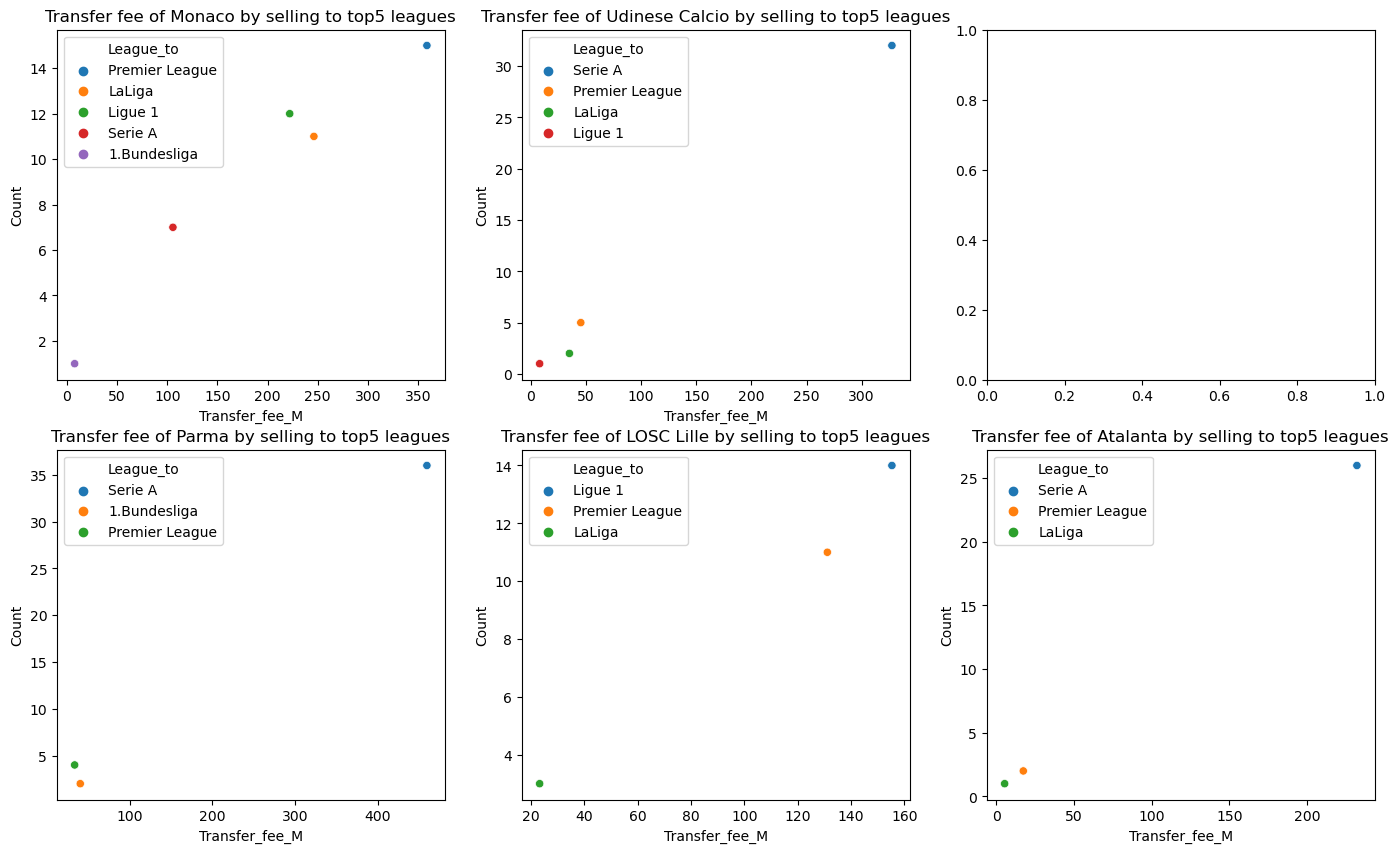

In [113]:
fig, axes = plt.subplots(2, 3, figsize=(17, 10))

axes[0,0].set_title("Transfer fee of Monaco by selling to top5 leagues")
sns.scatterplot(x= Monaco_five.Transfer_fee_M, y = Monaco_five.Count, hue = Monaco_five.League_to, ax = axes[0,0]);

axes[0,1].set_title("Transfer fee of Udinese Calcio by selling to top5 leagues")
sns.scatterplot(x= Udinese_Calcio_five.Transfer_fee_M, y = Udinese_Calcio_five.Count, hue = Udinese_Calcio_five.League_to,ax = axes[0,1]);

axes[1,0].set_title("Transfer fee of Parma by selling to top5 leagues")
sns.scatterplot(x= Parma_five.Transfer_fee_M, y = Parma_five.Count, hue = Parma_five.League_to, ax = axes[1,0]);

axes[1,1].set_title("Transfer fee of LOSC Lille by selling to top5 leagues")
sns.scatterplot(x= Lille_five.Transfer_fee_M, y = Lille_five.Count, hue = Lille_five.League_to, ax = axes[1,1]);

axes[1,2].set_title("Transfer fee of Atalanta by selling to top5 leagues")
sns.scatterplot(x= Atalanta_five.Transfer_fee_M, y = Atalanta_five.Count, hue = Atalanta_five.League_to, ax = axes[1,2]);



Dari grafik grafik diatas dapat disimpulkan tim tim ini menjual pemainnya ke Premier League, La liga dan tim dari liga mereka masing masing.


7. Bagaimana posisi pemain mempengaruhi harga pemain tersebut, apakah posisi penyerang memiliki harga yang lebih tinggi dibanding posisi lainnya?

In [114]:
forward = df_top5['Transfer_fee_M'][(df_top5['Position']=='Forward')]
midfielder = df_top5['Transfer_fee_M'][(df_top5['Position']=='Midfielder')]
defender = df_top5['Transfer_fee_M'][(df_top5['Position']=='Defender')]
goalkeeper = df_top5['Transfer_fee_M'][(df_top5['Position']=='Goalkeeper')]

In [115]:
#Menampilkan rata rata transfer fee pemain berdasarkan posisi
print(f'Average forward transfer fee : {forward.mean():.2f}')
print(f'Average midfielder transfer fee : {midfielder.mean():.2f}')
print(f'Average defender transfer fee : {defender.mean():.2f}')
print(f'Average goalkeeper transfer fee : {goalkeeper.mean():.2f}')


Average forward transfer fee : 12.23
Average midfielder transfer fee : 10.78
Average defender transfer fee : 9.28
Average goalkeeper transfer fee : 8.36


In [116]:
#Menentukan P value menggunakan ANOVA
from scipy import stats

res = stats.f_oneway(forward, midfielder, defender, goalkeeper)
print('P-value:',res.pvalue)

P-value: 7.937876658841271e-09


p-value memiliki nilai kurang dari 0.05, maka dapat disimpulkan bahwa posisi pemain memiliki pengaruh terhadap harga transfer pemain, Dimana rata rata harga penyerang sebesar 12.23 juta lebih tinggi dibanding posisi lainnya yaitu gelandang sebesar 10.78 juta, pemain bertahan sebesar 9.28 juta dan kiper sebesar 8.36 juta

In [117]:
df_top5.to_csv('Top_5_Transfer.csv', index=False)

Pengambilan Kesimpulan

Dari data data diatas dapat disimpulkan bahwa :

1. Perkembangan Transfer Market memiliki kenaikan dari masa ke masa, musim 2013/2014 merupakan musim yang memiliki pengaruh besar karena pada musim ini mengalami peningkatan yang signifikan pada jumlah transfer fee yang kemudian diikuti dengan musim musim berikutnya

2. Tim-tim dari La liga dan Premier league merupakan tim yang paling aktif dan menghabiskan banyak uang di Transfer market dibandingkan dengan tim dari liga lainnya 

3. Tim tim yang meraih pendapatan tertinggi pada Transfer Market merupakan tim tim papan tengah ke bawah yang menjual pemain pemainnya dengan harga tinggi ke tim yang lebih besar. Ini juga dapat diasumsikan bahwa tim tim lainnya meraup keuntungan utama bukan dari sektor Transfer market melainnya dari sektor lainya seperti sponsorship dan hak siar Televisi

4. Posisi pemain juga mempengaruhi keuntungan yang didapatkan dari Transfer Market, posisi penyerang cenderung memiliki harga yang lebih tinggi dibandingkan dengan posisi lainnya

In [118]:
#Menambahkan Tabel untuk pengolahan di Tableau

# clubs = clubs_income.merge(clubs_expense, left_on="Team_from", right_on="Team_to")
# clubs = clubs.drop(["Team_to"], axis=1)
# clubs = clubs.rename(columns={"Team_from": "Team"})
# clubs["Net_Spend_M"] = clubs["Total_Income_M"] - clubs["Total_Expense_M"]

# clubs.to_csv("clubs.csv", index=False)
